# **Tutorial 5a: Training neural networks**

**Module:** Deep Neural Networks and Learning Systems



---


**Objectives:**

- Explore different intuitions about gradient descent
- Learn how to train a single perceptron using the method of steepest descent
- Train a two-layers neural network using back-propagation
- Learn some intuitions about the geometry of the computations in the MLP

# Section 1: Training a perceptron

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

We will start by training a perceptron and visualizing what happens when take each step in the gradient descent algorithm. Remember that the general procedure is:


*   Forward pass: compute a prediction for your data points
*   Loss: compute the loss at each of those points
*   Compute the gradient (at each of your data points)
*   Perform the back propagation procedure to update your weights

**Question:** What does the sentence "at each of your data points" means? Think about we have a gradient for each of our training points.



In [20]:
# @title Useful functions

def plotDataClassPredictions(fig, ax, x, w):
  # Plots the predicted (or real) classes in different colors
  colors = np.array(['k', 'r'])

  for i in range(2*Nc):
    xi = x[i, :]
    yi = linear(xi, w)
    ax.scatter(xi[0], xi[1], color = colors[1 if yi > 0 else 0])

  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')


def plotWeightHyperplane( fig, ax, w ):
  # Plot the weight vector (0 -> W)
  ax.plot([0, w[0]], [0, w[1]], 'k')
  # Plot the vector perpedicular to W
  # W[0]Q[0] + W[1]Q[1] = 0 = W[0](-W[1]) + W[1](W[0])
  Q = np.array([-w[1], w[0]])/np.linalg.norm(w)
  # That's the hyperplane
  ax.plot([-Q[0], Q[0]], [-Q[1], Q[1]], 'b')


def plotLoss(fig, ax, x, idx):
  # Plots the loss function as a contour plot (because is a surface, we use colors to see the 3rd dimension)
  delta = 0.025
  w1 = np.arange(-4.0, 3.0, delta)
  w2 = np.arange(-4.0, 3.0, delta)
  W1, W2 = np.meshgrid(w1, w2)

  E = 0
  for i in idx:
    E += (y[i]*np.ones_like(W1) - (W1*x[i,0] + W2*x[i,1]))**2/2

  CS = ax.contour(W1, W2, E, 20)
  CB = fig.colorbar(CS)

def plotConstraint(fig, ax, x, y):
  # A constraint is a line
  ww = np.linspace(-4, 2.5, 20)
  ax.plot( (y - ww*x[1])/x[0], ww, 'r')



Pay attention to the following code. It is always useful to know how to simulate your own data!

Text(0.5, 1.0, 'Original classes')

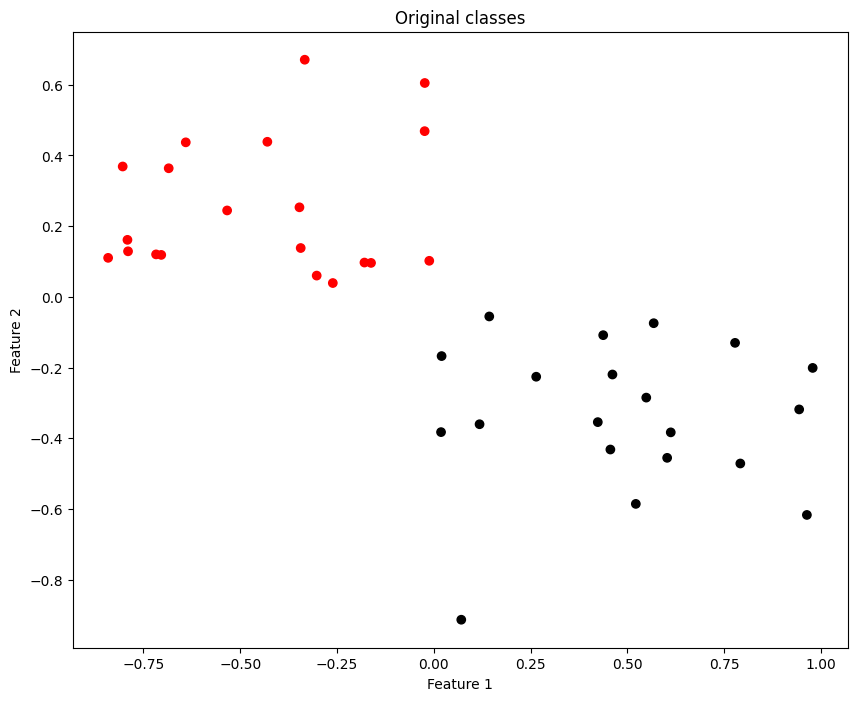

In [18]:
# @title Generating some data
Nc = 20
np.random.seed(0)
cdiff = np.array([0.5, -0.5])
x = np.vstack([np.random.rand(Nc, 2) - 0.5 + cdiff, np.random.rand(Nc, 2) - 0.5 - cdiff])
y = np.hstack([np.zeros(Nc), np.ones(Nc)])

colors = np.array(['k', 'r'])
plt.scatter(x[:, 0], x[:, 1], color = colors[[1 if yi > 0.5 else 0 for yi in y]])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original classes')

## Visualizing the data in **feature space**

Remember that in feature space, the perceptron is actually a hyperplane that separates each of our features in two regions. The weight vector is perpendicular to this hyperplane.

(np.float64(-1.0953104265709896),
 np.float64(1.0953104265709896),
 np.float64(-0.9931378412818832),
 np.float64(0.7727392603534438))

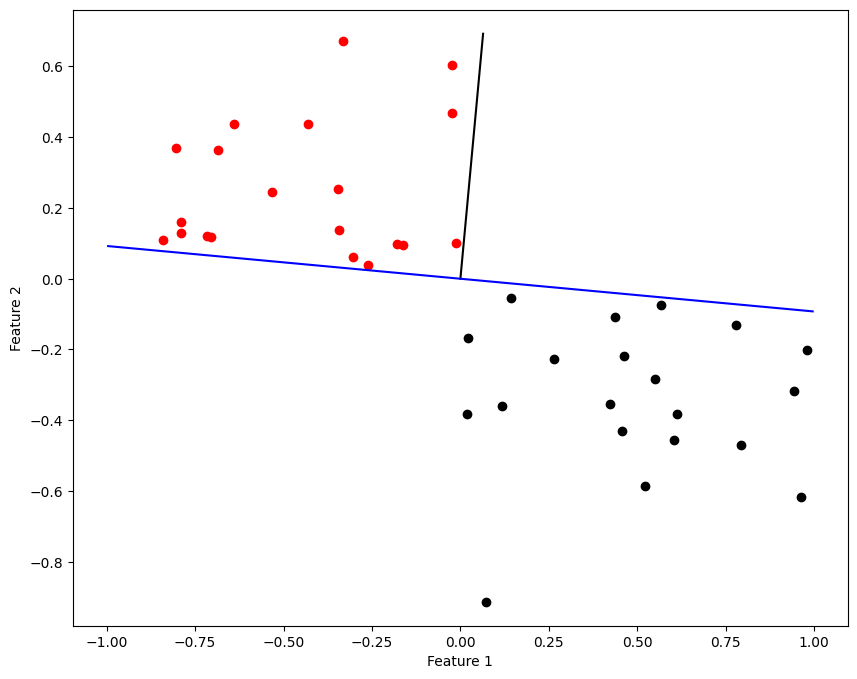

In [21]:
# Initialize weight vector
w = np.random.rand(2)
b = 0.0

fig, ax = plt.subplots()
plotWeightHyperplane( fig, ax, w)
plotDataClassPredictions(fig, ax, x, w)
plt.axis('equal')


We start by defining a linear network. We use functions to define each of the components of our model:

$$ \hat{y} = w \cdot x + b $$

Question: Calculate the derivative of this linear function with respect to the weights: $\frac{d\hat{y}}{dw}$

In [22]:
def linear( x, w ):
  z = np.dot(w,x.T) + b
  return z

# Loss
def L( yt, yp ):
  return (yt - yp)**2/2

# Derivatives
def dzdw( x, w ):
  return x

def dydz( x, w ):
  return 1

def dLdy(yt, yp):
  return -(yt - yp)


It is possible to plot the dynamics of gradient descent in **weight space**. by the dynamics I mean the trajectory of the weights as we apply the steps of gradient descent. In this case we do not need back propagation (why?)

Loss:  0.017776037836775994
Loss:  0.01644281656920488
Loss:  0.015209588278956679
Loss:  0.014068853389061602
Loss:  0.013013674798598007


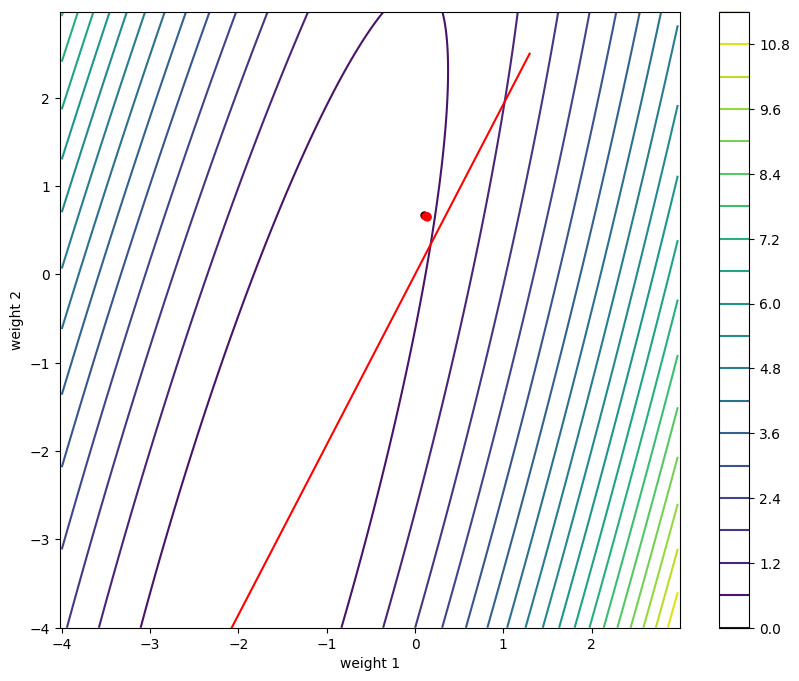

In [26]:
# Define the linear prediction function
def linear(x, w):
    return np.dot(x, w)

# Define the loss function
def L(y, yp):
    return np.mean((y - yp) ** 2)

# Define the gradient descent function
def doGradientDescent(x, y, w, eta, ax):
    for i in range(5):
        # Complete the prediction
        yp = linear(x, w)
        loss = L(y, yp)
        print("Loss: ", loss)

        # Calculate the gradients
        dLdw1 = -(y - yp) * x[0]
        dLdw2 = -(y - yp) * x[1]
        
        # Update the weights
        w[0] = w[0] - eta * dLdw1
        w[1] = w[1] - eta * dLdw2
        
        # Plot the updated weights
        ax.plot(w[0], w[1], 'ro', markersize=5)

fig, ax = plt.subplots()
ax.plot(w[0], w[1], 'k.', markersize = 10)

xd = x[0,:] #point 1 # input x1[0], x1[1]
yd = y[0]   #target

# z = x[23, :]  #point2
# w = y[23]

plotLoss( fig, ax, x, [0, 23])
# Why do the inputs look like lines in weight space?
plotConstraint( fig, ax, xd, yd)
# plotConstraint( fig, ax, z, w)

eta = 0.1
w0 = w.copy()

# Exercise:
# 1. Perform gradient descent following the gradient for point 1
# 2. Do the same for gradient of point 2
# 3. Do this iteratively first move in the direction of point 1, then in the direction of point 2
# 4. Do this but move in the direction of the sum of both gradients
# Plot the weights at each step



doGradientDescent(xd, yd, w0, eta, ax)
# doGradientDescent(x[0], y[0])
# doGradientDescent(x[23, :], y[23])
    


plt.axis('equal')
plt.xlabel('weight 1')
plt.ylabel('weight 2')
plt.show()


Plot the data and the hyperplane again after some steps of gradient descent (feature space)


## Perceptron: adding a non-linearity.

Now we can train our first perceptron. It is essentially the same, we just need to add a **nonlinearity** after the linear computation.

$$\phi(x) = \mbox{ReLU}(x)$$


In [ ]:
# Model
# Modules
def phi( z ):
  f = lambda z: z*(z>0)# ReLU
  return f(z)

def perceptron( x, w ):
  return phi(linear(x, w))

def dydz( z ):
  return 1.*(z >= 0) # This is an interesting derivative!

# Gradient
def gradient( y, yp, x, w ):
  dLdw = dLdy(y, yp)*dydz(linear(x,w))*dzdw(x, w) # We need the chain rule why?
  return dLdw

# Compute the output of the perceptron
yp = perceptron( x[0, :], w )

print(f"Output for the first data point: {yp}")

Output for the first data point: 0.05652695691697701


Let run one step of gradient descent!

In [ ]:
w0 = w
g = 0
loss = 0
for i in range(2*Nc):
  xi = x[i, :]
  yi = y[i]
  yp = perceptron( xi , w0 )
  loss += L(yi, yp)
  g += gradient( yi, yp, xi, w0 )

print( f"Current loss: {loss}")
w0 = w0 - 0.1*g
print(g)
loss = 0
g = 0
for i in range(2*Nc):
  xi = x[i, :]
  yi = y[i]
  yp = perceptron( xi , w0 )
  loss += L(yi, yp)
  g += gradient( yi, yp, xi, w0 )
print( f"New loss: {loss}")

Current loss: 9.459739257958487
[ 1.57115241 -2.16004357]
New loss: 8.271023577842088




---


**Exercise:** Modify the previous code to:
1. Compute the gradient on batches of 5 data points
2. Run at least 20 steps of gradient descent
3. Plot the loss at the end of the process.

---



# Section 2: Training a multilayer perceptron with backpropagation

No we will try a classification problem on a dataset that cannot be solved with only one perceptron, can you see why? We need to add a **hidden layer**!

Text(0, 0.5, 'Feature 2')

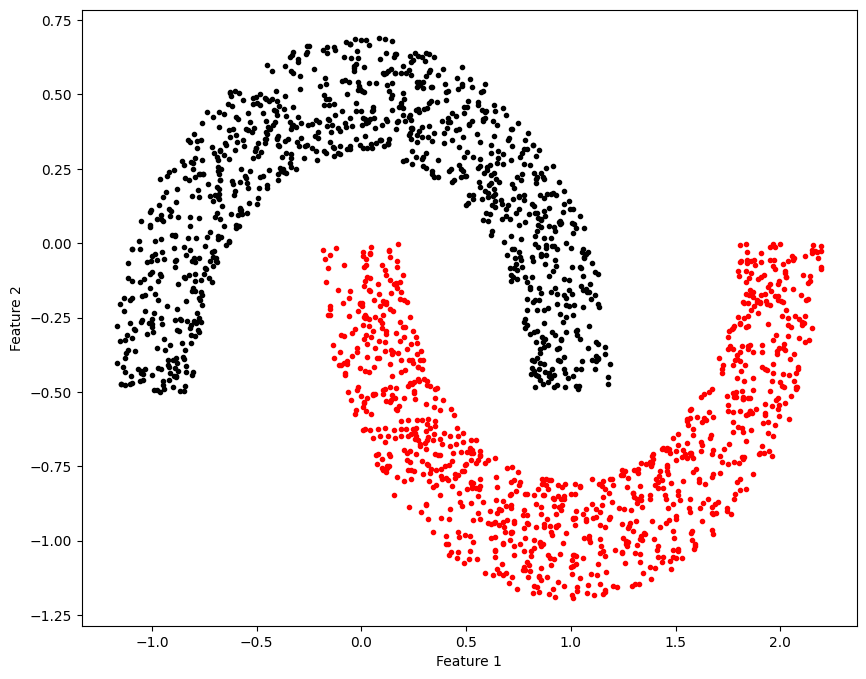

In [ ]:
# @title Generating the second dataset
moon1 = lambda r, theta: np.array([r*np.cos(theta), r*np.sin(theta) - 0.5])
moon2 = lambda r, theta: np.array([r*np.cos(theta) + 1, r*np.sin(theta)])
# Moon one
noise = 0.4
num_samples = 1000
theta = np.random.rand(num_samples)*np.pi # Random angles between 0 and pi
radius = 1 + (np.random.rand(len(theta))-0.5)*noise
X1 = moon1(radius, theta) # (x1,y1), (x1, y2), ...
Y1 = np.zeros(num_samples) # Class 0
plt.plot(X1[0,:], X1[1,:], 'k.')
# Moon two
theta = -np.random.rand(num_samples)*np.pi
X2 = moon2(1 + (np.random.rand(len(theta))-0.5)*noise, theta)
Y2 = np.ones(num_samples) # class 1
plt.plot(X2[0,:], X2[1,:], 'r.')

X = np.hstack([X1, X2]) # Concatenate coordinates
Y = np.hstack([Y1, Y2]) # Concatenate classes

# Shuffling
idxs = np.array(range(len(Y)))
np.random.shuffle(idxs)

X = X[:,idxs]
Y = Y[idxs]

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

We can define our network by **composing** different layers. Our perceptron is:

$$ \hat{y}(x) = \phi(W_2 \phi(W_1 x + b_1) + b_2 ) $$

Task: Draw this network. What is the size of each of the layers? How many layers?


In [ ]:
W1 = np.random.rand(2,2)
W2 = np.random.rand(1,2)


def linear( x, W ):
  return np.dot(W, x)

def relu( z ):
  f = lambda z: z*(z>0)# sigmoid
  return f(z)

def layer( x, W ):
  return relu(linear(x, W))

def network( x, W1, W2 ):
  return layer(layer(x, W1), W2)

def L( yt, yp ):
  return (yt - yp)**2/2


layer(X[:, 40], W1)
network(X[:, 40], W1, W2)

array([0.78210338])



---


**Implementing back propagation:** Let's do some calculations. Compute the gradients for each layer and perform gradient descent! :


---



In [ ]:
# dL/dW1?

# dL/dW2?



## Interpretabiliy/explainability step

Visualzing the boundaries of the two classes and the latent space:

1. Plot the latent projection (onto the hidden layer) for each of the input points.

2. In a separate figure, plot the data points again but color them with the classification from your neural network after training

3. (Advanced) Use the function plt.confourf() To plot the contours ouf you network (the regions of the 2D plane that get mapped to each class). For example:

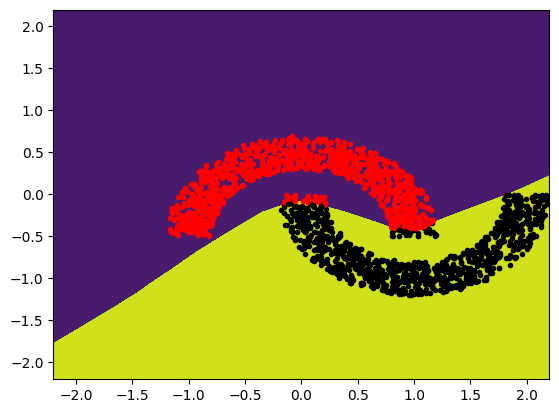





In [ ]:
# Your code here